In [37]:
import json
import pandas as pd
from geopy.geocoders import Nominatim
import numpy as np
import ast
from json import loads, dumps
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [2]:
#all possible categories
#specialities
df = pd.read_json('clinic-info.json')
df

,clinic_name,address1,adress2,state,city,zip,phone,practiceHub,televet_services,accepts_insurance,emergency_services,specialities,categories
0,MASSACHUSETTS VET MEDICAL ASSN,163 LAKESIDE AVE,CHARITIES INC,MA,MARLBOROUGH,01752,5084609333,False,False,False,False,[],"[Food Animal, Swine]"
1,QUINCY ANIMAL SHELTER,43 THOMAS BURGIN PKWY,,MA,QUINCY,02169-4209,6174793080,True,True,False,False,[],[]
2,Countryside Animal Hospital - Granby,164 W STATE ST,,MA,GRANBY,01033-9606,4134671300,False,False,True,True,"[Nutrition, Oncology]",[]
3,AGAWAM ANIMAL HOSPITAL,65 MILL ST,STE 1,MA,AGAWAM,01001-2393,4137864440,True,False,True,False,"[Nutrition, Oncology]",[]
4,SKIPTON VET CLINIC,70 SOUTHAMPTON ST,,MA,BOSTON,02118-2711,6178770973,False,False,False,True,"[Cardiology, Neurology]","[Food Animal, Swine]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,"Caroline Winn, DVM",17 MAPLE ST,,MA,SCITUATE,02066-3609,6315611580,False,True,True,True,"[Oncology, Radiology]",[Equine]
1181,Bond Vet - Seaport Boston,117 AUTUMN LN,,MA,BOSTON,02210-2350,6173028389,False,False,False,False,[Oncology],[]
1182,PetMedic Urgent Care Westborough,1 Oak St,,MA,Westborough,01581-2655,5085254844,False,False,True,True,[],[]
1183,Matthew K. Hogan,115 MILL ST,,MA,BELMONT,02478-1064,6175841434,False,False,False,True,[Cardiology],[Reptile and Amphibian]


In [ ]:
df['categories']('state').count()

In [3]:
#df['categories'].unique()
df.groupby('state').count()

,clinic_name,address1,adress2,city,zip,phone,practiceHub,televet_services,accepts_insurance,emergency_services,specialities,categories
state,,,,,,,,,,,,
MA,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185


In [4]:
df.explode('specialities')['specialities'].unique()

array([nan, 'Nutrition', 'Oncology', 'Cardiology', 'Neurology',
       'Dermatology', 'Radiology'], dtype=object)

In [5]:
df.explode('categories')['categories'].unique()

array(['Food Animal', 'Swine', nan, 'Equine', 'Exotic',
       'Reptile and Amphibian', 'Beef Cattle', 'Avian',
       'Canine and Feline', 'Dairy'], dtype=object)

In [6]:
df.explode('categories')['categories'].unique()

array(['Food Animal', 'Swine', nan, 'Equine', 'Exotic',
       'Reptile and Amphibian', 'Beef Cattle', 'Avian',
       'Canine and Feline', 'Dairy'], dtype=object)

In [7]:
df.explode('specialities').groupby('specialities').count()

,clinic_name,address1,adress2,state,city,zip,phone,practiceHub,televet_services,accepts_insurance,emergency_services,categories
specialities,,,,,,,,,,,,
Cardiology,195,195,195,195,195,195,195,195,195,195,195,195
Dermatology,216,216,216,216,216,216,216,216,216,216,216,216
Neurology,194,194,194,194,194,194,194,194,194,194,194,194
Nutrition,205,205,205,205,205,205,205,205,205,205,205,205
Oncology,183,183,183,183,183,183,183,183,183,183,183,183
Radiology,195,195,195,195,195,195,195,195,195,195,195,195


In [12]:
def get_lat(address,city,state) :
    print(address)
    try :
        location = locator.geocode('' + address + ', ' + city + ', ' + state)
    except :
        return "NAN"
    if location is None :
        return "NAN"
    return location.latitude
    

In [13]:
locator = Nominatim(user_agent="myGeocoder")
def get_long(address,city,state) :
    print(address)
    try :
        location = locator.geocode('' + address + ', ' + city + ', ' + state)
    except :
        return "NAN"
    if location is None :
        return "NAN"
    return location.longitude

In [10]:
get_lat('163 LAKESIDE AVE','MARLBOROUGH','MA')

42.34249715

In [11]:
get_long('163 LAKESIDE AVE','MARLBOROUGH','MA')

-71.56798336764095

In [12]:
df_sample = df.loc[:5,:]
df_sample

,clinic_name,address1,adress2,state,city,zip,phone,practiceHub,televet_services,accepts_insurance,emergency_services,specialities,categories
0,MASSACHUSETTS VET MEDICAL ASSN,163 LAKESIDE AVE,CHARITIES INC,MA,MARLBOROUGH,01752,5084609333,False,False,False,False,[],"[Food Animal, Swine]"
1,QUINCY ANIMAL SHELTER,43 THOMAS BURGIN PKWY,,MA,QUINCY,02169-4209,6174793080,True,True,False,False,[],[]
2,Countryside Animal Hospital - Granby,164 W STATE ST,,MA,GRANBY,01033-9606,4134671300,False,False,True,True,"[Nutrition, Oncology]",[]
3,AGAWAM ANIMAL HOSPITAL,65 MILL ST,STE 1,MA,AGAWAM,01001-2393,4137864440,True,False,True,False,"[Nutrition, Oncology]",[]
4,SKIPTON VET CLINIC,70 SOUTHAMPTON ST,,MA,BOSTON,02118-2711,6178770973,False,False,False,True,"[Cardiology, Neurology]","[Food Animal, Swine]"
5,Tender Heart Veterinary Care - Gardner,7 PEARSON BLVD,,MA,GARDNER,01440-3909,9786320024,False,False,True,False,[],[Equine]


In [14]:
df['longitude'] = df.apply(lambda row : get_long(row['address1'],row['city'],row['state']),axis=1)
df['latitude'] = df.apply(lambda row : get_lat(row['address1'],row['city'],row['state']),axis=1)
df

163 LAKESIDE AVE
43 THOMAS BURGIN PKWY
164 W STATE ST
65 MILL ST
70 SOUTHAMPTON ST
7 PEARSON BLVD
350 S HUNTINGTON AVE
150 S HUNTINGTON AVE
48 SOUTHBOURNE RD
1627 OSGOOD ST
255 FREEPORT ST
1036 WALNUT ST
326 BRIDGE ST
1415 OSTERVILLE RD
265 CHELMSFORD ST
35 GREAT RD
100 PECK ST
479 NORTHFIELD RD
48 BLISS ST
11 BRIERWAY DR
84 SW CUTOFF
180 BEAR HILL RD STE C
96 HUDSON RD
13 EXCHANGE ST
1849 OCEAN ST
239 BOSTON RD
17 LAURELWOOD RD
103 DEPOT ST
1098 MAIN ST
75 LOCUST ST
15 LOWELL ST
60 MASSACHUSETTS AVE
79 THEOPHILIS SMITH RD
895 TURKEY ST
11 DUDLEY OXFORD RD
1 4TH AVE
5 SHARON AVE
39 PLEASANT ST
29 DOMINO DR
900 BROADWAY
28 RIEDELL RD
250 MAIN ST
34 THOMPSON RD
1026 MILLERS FALLS RD
1901 S STATE RD
139 EAST ST
188 NATHAN ELISS HWY
72 ASH ST
4 Strawberry Hill Rd
602 WASHINGTON ST
24 HALL AVE
108 W BERLIN RD

350 S HUNTINGTON AVE
PO Box 686
83 Shank Painter Rd
Dr. Mary Alexander  Boston MA
100 Carlson Ave
P.O. Box 541435
163 HIGHLAND AVE
58 NIMROD DR
21 SUMMER ST
2 COLTON RD
220 BROOK ST
5

178 SPRING ST
250 GROSSMAN DR
16 ANNA RD
259A CAMBRIDGE ST
619 EAST ST
9 HOWE ST
128 UXBRIDGE RD
56 ANNIE MOORE RD
661 Massachusetts Ave
665 MASSACHUSETTS AVE
10 ARGYLE RD
476 BEDFORD ST
144 CHARLTON RD
401 MAIN ST
394 UNDER MOUNTAIN RD
200 CENTER ST
1 GRAFTON RD
11 THATCHER ST
5 QUAIL RUN
20 CABOT RD
89 COMMERCIAL RD
259 ELM ST
26 KENT RD
34 OSTERVILLE WEST BARNSTABLE RD
291 QUINCY AVE
PO BOX 620
22 LISA LN
473 NORTH ST
55 Union St
null
627 COTTAGE ST
565 MAPLE ST
295 BRIGGS RD
38 RIVERVIEW DR
137A STONY HILL RD
110 N HILLSIDE RD
Unnamed Road
2700 STATE HWY RTE 6


3 SPRAGUE RD
165 BROAD ST
60 MASSACHUSETTS AVE
55 WILLARD ST
108 Newburyport Tpke
4 WINSTEAD AVE
105 CURTIS AVE
82 SOUTHBOURNE RD
3 FARWELL RD
110 MILLER ST
301 DALTON AVE
232 SILVER ST
374 BOSTON ST
33 POND AVE
231 SALEM ST
27 ROBERT J WAY
96 SUMMER ST
112 SHAKER RD
333 SWANSEA MALL DR
249 MILTON ST
200 MECHANIC ST
436 N KING ST
154 STURBRIDGE RD
10 PLEASANT ST
18 FRENCH KING HWY
112 OLD WASHINGTON ST
29 Lowell St
643 FALL

9 HODGES ST
48 Gardner Rd
392C BALL HILL RD
227 FARM ST
Mobile Vet
40 Daniel Shays Hwy
Mobile
1663 BEACON ST
85 MAIN ST
91 GROTON RD
166 MECHANIC ST
150 Presidential Way
1229 ORLEANS RD

290 CUTLER RD
780 CHIEF JUSTICE CUSHING HWY
74 CAREY AVE
459 STONY HILL RD
70 WORCESTER PROVIDENCE TPKE
386 BELMONT ST
1116 N MAIN ST
420 MAPLE ST
238 PARK ST
31 RAILROAD AVE
20 COMMERCIAL ST
120 CANAL ST
78 HIGH ST
30 ELM ST
37 MONTGOMERY ST
1430 MEMORIAL DR
295 WASHINGTON ST
141 WINTHROP AVE
41 CRANBERRY ST
117 DRUM HILL RD
157 AIRPORT RD
79 PROSPECT ST
21 WILBRAHAM ST
459 WORCESTER ST
109 MASSACHUSETTS AVE
29 KING ST
201 COUNTY ST
2700 STATE HWY RTE 6
101A 1st Ave
930 COMMONWEALTH AVE
1260 Boylston St
4 PLUMTREE RD
20 Airport Rd
94 CARESWELL ST
139 HOLDEN ST
180 WARE RD
74 BIRCH DR
50 OVERLOOK RD
2424 WINTHROP ST
Shelburne
764 BROADWAY
40 E MAIN ST
304 Commonwealth Ave
381 Baldwinville Rd
123 TERRACE ST
660 WEST ST
75 KNEELAND ST
280B ROUTE 130
23 BAY STATE RD
840 Memorial Dr
128 PARKER ST
92 ELLERY

443 BOSTON ST
15 FLANDERS RD
123 SAMOSET ST
302 N BEDFORD ST
330 Boston Rd
95 CROSS ST
750 STATE RD
278 SOUTHBRIDGE RD
11 FLETCHER ST
720 CAMBRIDGE ST
286 W MAIN ST
1182 BERNARDSTON RD
190 BARKER ST
66 E GROVE ST
1240 PARK ST
20 LINDEN ST
288 Newbury St
5 MYSTIC VIEW RD
492 ROUTE 6A
70 MAIN ST
10 CHANDLER ST
150 STANIFORD ST
14 FRUIT ST
168 TEATICKET HWY
1184 SANDWICH RD
138 W MAIN ST
127 WASHINGTON ST
25 CARLISLE RD
1415 MAIN ST
2 ROUTE 130
475 WHISTLEBERRY DR
99 MAIN ST
480 HAWES HILL RD
10 SANDY LN
21 PLYMOUTH ST
151 PALMER RD
277 ELM ST
176 N END RD
441 LAKESIDE AVE
1451 HIGH ST
39 LAWLEY ST
155 WINTHROP ST
577 GROVE ST
950 CUMMINGS CTR
77 Powdermill Rd
245 County Rd
Self Practice
51 PARK PLACE WAY
PO Box 55
53 MUNNS FERRY RD
50 COHASSET AVE
1240 Park St
7 KIRTLAND ST
117 E BARE HILL RD
7 WESTWARD CIR
7 N MARKET ST
5 RIDGE RD
220 SANDWICH RD
289 sycamore st
70 LONG AVE
31 LEXINGTON RD
11 Robert Toner Blvd
7 Littleton Road
156 Cambridge St
15 APPLE ST
196 BOSTON TPKE
15 Stockwell Dr

475 T SENGEKONTACKET
153 MOUNT AUBURN ST
14 Glendale Middle Rd
697 TEMPLETON RD
BOURNEDALE RD
1014 PEARL ST
34 FISHER ST
25 FARRAR RD
56 UNDERPASS RD
3 BRIDGE ST
18 SOUTH RD
34 LONG POND RD
114 MASSACHUSETTS AVE
175 CHARLTON RD
120 LAKE ST
311 HILL RD
Po Box 322
117 LYMAN RD
812 CENTRAL ST
187 W MAIN ST

680 Grover Street
233 BATCHELOR ST


718 BEACON ST

29 FRANCIS ST
216 COLONY PLACE RD
402 SOUTH ST E
230 MAIN ST
14 SANDY LN
35 WESTBROOK RD
612 PLEASANT ST
784 E 3RD ST
152 BOSTON POST RD
38 Clapp Street Ext
80 SANDWICH ST
308 COURT ST
71 ASHFIELD RD
58 ELM ST
944 MAIN ST
89 UNION ST
35 VENTURA DR
100 CUMMINGS CTR
662 BOSTON POST RD
705 N SHORE RD
9 PELHAM ISLAND RD
77 AVENUE LOUIS PASTEUR
251 CHELSEA ST
19 RANDOLPH ST
511 NEWTON ST
375 E WASHINGTON ST
400 S MAIN ST
599 CONCORD ST
56 VILLAGE XING
1183 MASSACHUSETTS AVE
839 S MAIN ST
1964 BOSTON RD
18 GRANITE ST
920 PLEASANT ST
386 MAIN ST
259 PLYMOUTH ST
167 SADDLE HILL RD
716 LOWELL RD
167 CLINTON RD
25 FARRAR RD
11 THATCHER ST
164 S

,clinic_name,address1,adress2,state,city,zip,phone,practiceHub,televet_services,accepts_insurance,emergency_services,specialities,categories,longitude,latitude
0,MASSACHUSETTS VET MEDICAL ASSN,163 LAKESIDE AVE,CHARITIES INC,MA,MARLBOROUGH,01752,5084609333,False,False,False,False,[],"[Food Animal, Swine]",-71.567983,42.342497
1,QUINCY ANIMAL SHELTER,43 THOMAS BURGIN PKWY,,MA,QUINCY,02169-4209,6174793080,True,True,False,False,[],[],-71.008479,42.25428
2,Countryside Animal Hospital - Granby,164 W STATE ST,,MA,GRANBY,01033-9606,4134671300,False,False,True,True,"[Nutrition, Oncology]",[],-72.52968,42.253619
3,AGAWAM ANIMAL HOSPITAL,65 MILL ST,STE 1,MA,AGAWAM,01001-2393,4137864440,True,False,True,False,"[Nutrition, Oncology]",[],-72.631205,42.066973
4,SKIPTON VET CLINIC,70 SOUTHAMPTON ST,,MA,BOSTON,02118-2711,6178770973,False,False,False,True,"[Cardiology, Neurology]","[Food Animal, Swine]",-71.071176,42.332621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,"Caroline Winn, DVM",17 MAPLE ST,,MA,SCITUATE,02066-3609,6315611580,False,True,True,True,"[Oncology, Radiology]",[Equine],-70.775306,42.19408
1181,Bond Vet - Seaport Boston,117 AUTUMN LN,,MA,BOSTON,02210-2350,6173028389,False,False,False,False,[Oncology],[],-71.046419,42.351143
1182,PetMedic Urgent Care Westborough,1 Oak St,,MA,Westborough,01581-2655,5085254844,False,False,True,True,[],[],-71.608544,42.285605
1183,Matthew K. Hogan,115 MILL ST,,MA,BELMONT,02478-1064,6175841434,False,False,False,True,[Cardiology],[Reptile and Amphibian],-71.190245,42.393268


In [18]:
df.to_csv('with_lat_lon.csv',index=False)


In [11]:
df_lat_lon = pd.read_csv('with_lat_lon.csv',dtype={'phone': str})
#df_lat_lon['phone'] = df_lat_lon['phone'].astype(str)
#df_lat_lon['phone'] = df_lat_lon['phone'].str[:-2]
df_lat_lon['practiceHub'] = df_lat_lon['practiceHub'].apply(lambda answer : 1 if answer else 0)
df_lat_lon['emergency_services'] = df_lat_lon['emergency_services'].apply(lambda answer : 1 if answer else 0)
df_lat_lon['accepts_insurance'] = df_lat_lon['accepts_insurance'].apply(lambda answer : 1 if answer else 0)
df_lat_lon['televet_services'] = df_lat_lon['televet_services'].apply(lambda answer : 1 if answer else 0)
df_lat_lon['zip'] = df_lat_lon['zip'].apply(lambda answer : answer[0:5])
df_lat_lon

,clinic_name,address1,adress2,state,city,zip,phone,practiceHub,televet_services,accepts_insurance,emergency_services,specialities,categories,longitude,latitude
0,MASSACHUSETTS VET MEDICAL ASSN,163 LAKESIDE AVE,CHARITIES INC,MA,MARLBOROUGH,01752,5084609333,0,0,0,0,[],"['Food Animal', 'Swine']",-71.56798336764095,42.34249715
1,QUINCY ANIMAL SHELTER,43 THOMAS BURGIN PKWY,NaN,MA,QUINCY,02169,6174793080,1,1,0,0,[],[],-71.00847895,42.254280050000006
2,Countryside Animal Hospital - Granby,164 W STATE ST,NaN,MA,GRANBY,01033,4134671300,0,0,1,1,"['Nutrition', 'Oncology']",[],-72.52968015165848,42.25361875
3,AGAWAM ANIMAL HOSPITAL,65 MILL ST,STE 1,MA,AGAWAM,01001,4137864440,1,0,1,0,"['Nutrition', 'Oncology']",[],-72.63120485,42.0669733
4,SKIPTON VET CLINIC,70 SOUTHAMPTON ST,NaN,MA,BOSTON,02118,6178770973,0,0,0,1,"['Cardiology', 'Neurology']","['Food Animal', 'Swine']",-71.07117594997487,42.33262105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,"Caroline Winn, DVM",17 MAPLE ST,NaN,MA,SCITUATE,02066,6315611580,0,1,1,1,"['Oncology', 'Radiology']",['Equine'],-70.77530608471923,42.194079599999995
1181,Bond Vet - Seaport Boston,117 AUTUMN LN,NaN,MA,BOSTON,02210,6173028389,0,0,0,0,['Oncology'],[],-71.0464195,42.3511432
1182,PetMedic Urgent Care Westborough,1 Oak St,NaN,MA,Westborough,01581,5085254844,0,0,1,1,[],[],-71.6085437,42.285605
1183,Matthew K. Hogan,115 MILL ST,NaN,MA,BELMONT,02478,6175841434,0,0,0,1,['Cardiology'],['Reptile and Amphibian'],-71.19024470958927,42.393267949999995


In [12]:
df_lat_lon = df_lat_lon[df_lat_lon['longitude'] != 'NAN']

In [13]:
df_lat_lon['categories'].apply(ast.literal_eval).explode()

0                 Food Animal
0                       Swine
1                         NaN
2                         NaN
3                         NaN
                ...          
1180                   Equine
1181                      NaN
1182                      NaN
1183    Reptile and Amphibian
1184                      NaN
Name: categories, Length: 1343, dtype: object

In [14]:
df_lat_lon['categories'].explode()

0        ['Food Animal', 'Swine']
1                              []
2                              []
3                              []
4        ['Food Animal', 'Swine']
                  ...            
1180                   ['Equine']
1181                           []
1182                           []
1183    ['Reptile and Amphibian']
1184                           []
Name: categories, Length: 1009, dtype: object

In [15]:
df_lat_lon_explode = pd.concat([df_lat_lon.drop('categories', axis=1), pd.get_dummies(df_lat_lon['categories'].apply(ast.literal_eval).explode()).groupby(level=0).sum()], axis=1)
df_lat_lon_explode = pd.concat([df_lat_lon_explode.drop('specialities', axis=1), pd.get_dummies(df_lat_lon_explode['specialities'].apply(ast.literal_eval).explode()).groupby(level=0).sum()], axis=1)
df_lat_lon_explode

,clinic_name,address1,adress2,state,city,zip,phone,practiceHub,televet_services,accepts_insurance,...,Exotic,Food Animal,Reptile and Amphibian,Swine,Cardiology,Dermatology,Neurology,Nutrition,Oncology,Radiology
0,MASSACHUSETTS VET MEDICAL ASSN,163 LAKESIDE AVE,CHARITIES INC,MA,MARLBOROUGH,01752,5084609333,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,QUINCY ANIMAL SHELTER,43 THOMAS BURGIN PKWY,NaN,MA,QUINCY,02169,6174793080,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Countryside Animal Hospital - Granby,164 W STATE ST,NaN,MA,GRANBY,01033,4134671300,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,AGAWAM ANIMAL HOSPITAL,65 MILL ST,STE 1,MA,AGAWAM,01001,4137864440,1,0,1,...,0,0,0,0,0,0,0,1,1,0
4,SKIPTON VET CLINIC,70 SOUTHAMPTON ST,NaN,MA,BOSTON,02118,6178770973,0,0,0,...,0,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,"Caroline Winn, DVM",17 MAPLE ST,NaN,MA,SCITUATE,02066,6315611580,0,1,1,...,0,0,0,0,0,0,0,0,1,1
1181,Bond Vet - Seaport Boston,117 AUTUMN LN,NaN,MA,BOSTON,02210,6173028389,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1182,PetMedic Urgent Care Westborough,1 Oak St,NaN,MA,Westborough,01581,5085254844,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1183,Matthew K. Hogan,115 MILL ST,NaN,MA,BELMONT,02478,6175841434,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [16]:
df_lat_lon_explode.columns

Index(['clinic_name', 'address1', 'adress2', 'state', 'city', 'zip', 'phone',
       'practiceHub', 'televet_services', 'accepts_insurance',
       'emergency_services', 'longitude', 'latitude', 'Avian', 'Beef Cattle',
       'Canine and Feline', 'Dairy', 'Equine', 'Exotic', 'Food Animal',
       'Reptile and Amphibian', 'Swine', 'Cardiology', 'Dermatology',
       'Neurology', 'Nutrition', 'Oncology', 'Radiology'],
      dtype='object')

In [17]:
df_lat_lon_explode.to_json('final_clinic_data.json',orient="records")
# parsed = loads(result)
# dumps(parsed, indent=4) 

In [21]:
sw = df_lat_lon_explode[df_lat_lon_explode['Swine']==1]
sw = sw[sw['Food Animal']==1]
sw

,clinic_name,address1,adress2,state,city,zip,phone,practiceHub,televet_services,accepts_insurance,...,Exotic,Food Animal,Reptile and Amphibian,Swine,Cardiology,Dermatology,Neurology,Nutrition,Oncology,Radiology
0,MASSACHUSETTS VET MEDICAL ASSN,163 LAKESIDE AVE,CHARITIES INC,MA,MARLBOROUGH,01752,5084609333,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,SKIPTON VET CLINIC,70 SOUTHAMPTON ST,NaN,MA,BOSTON,02118,6178770973,0,0,0,...,0,1,0,1,1,0,1,0,0,0
98,NORWOOD ANIMAL HOSPITAL,437 WALPOLE ST,NaN,MA,NORWOOD,02062,7817693011,0,0,0,...,0,1,0,1,1,0,0,0,0,0
173,COMPASSIONATE CARE VET,1147 N MAIN ST,FOR THE LOVE OF CATS,MA,RANDOLPH,02368,7819860900,1,0,1,...,0,1,0,1,0,0,1,0,0,1
208,A House Call Vet - Weston,514 NORTH AVE,NaN,MA,WESTON,02493,8884147297,0,0,1,...,0,1,0,1,1,0,0,0,0,0
592,Better Vet Boston-Dr Sidley,60 MASSACHUSETTS AVE,NaN,MA,BOSTON,02115,6179396144,0,0,1,...,0,1,0,1,1,0,0,0,0,0
685,DIGIOVANNI MARIA DVM ANIMAL CLINIC,86 CHESTNUT ST,NaN,MA,BROOKLINE,02445,6172323527,1,0,0,...,0,1,0,1,1,1,0,0,0,0
690,SURFACE LOGIX Inc.,50 SOLDIERS FIELD PL,NaN,MA,BRIGHTON,02135,6177838866,0,1,1,...,0,1,0,1,0,1,0,0,0,0
829,Thrive Pet Healthcare - Natick,121 W CENTRAL ST,NaN,MA,NATICK,01760,5086535020,0,0,0,...,0,1,0,1,0,0,0,1,0,0
830,CAPE ANN VETERINARY HOSPITAL,462 ESSEX AVE,NaN,MA,GLOUCESTER,01930,9782833238,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [23]:
#lat long
#42.91, -70.727691 top right
#42.91, -73.479766 top left
#41.18, -73.748931 bottom left
#41.18, -69.903717 bottom right
df_final = df_lat_lon_explode[df_lat_lon_explode['latitude'].astype(float) <= 42.91]
df_final = df_final[df_final['latitude'].astype(float) >= 41.18]
df_final = df_final[df_final['longitude'].astype(float) <= -69.903717]
df_final = df_final[df_final['longitude'].astype(float) >= -73.748931]
df_final

,clinic_name,address1,adress2,state,city,zip,phone,practiceHub,televet_services,accepts_insurance,...,Exotic,Food Animal,Reptile and Amphibian,Swine,Cardiology,Dermatology,Neurology,Nutrition,Oncology,Radiology
0,MASSACHUSETTS VET MEDICAL ASSN,163 LAKESIDE AVE,CHARITIES INC,MA,MARLBOROUGH,01752,5084609333,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,QUINCY ANIMAL SHELTER,43 THOMAS BURGIN PKWY,NaN,MA,QUINCY,02169,6174793080,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Countryside Animal Hospital - Granby,164 W STATE ST,NaN,MA,GRANBY,01033,4134671300,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,AGAWAM ANIMAL HOSPITAL,65 MILL ST,STE 1,MA,AGAWAM,01001,4137864440,1,0,1,...,0,0,0,0,0,0,0,1,1,0
4,SKIPTON VET CLINIC,70 SOUTHAMPTON ST,NaN,MA,BOSTON,02118,6178770973,0,0,0,...,0,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,"Caroline Winn, DVM",17 MAPLE ST,NaN,MA,SCITUATE,02066,6315611580,0,1,1,...,0,0,0,0,0,0,0,0,1,1
1181,Bond Vet - Seaport Boston,117 AUTUMN LN,NaN,MA,BOSTON,02210,6173028389,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1182,PetMedic Urgent Care Westborough,1 Oak St,NaN,MA,Westborough,01581,5085254844,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1183,Matthew K. Hogan,115 MILL ST,NaN,MA,BELMONT,02478,6175841434,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [24]:
df_final.to_json('final_clinic_data.json',orient="records")

In [54]:
df_final.to_csv('final_clinic_data.csv',index=False)

In [26]:
df_final.columns

Index(['clinic_name', 'address1', 'adress2', 'state', 'city', 'zip', 'phone',
       'practiceHub', 'televet_services', 'accepts_insurance',
       'emergency_services', 'longitude', 'latitude', 'Avian', 'Beef Cattle',
       'Canine and Feline', 'Dairy', 'Equine', 'Exotic', 'Food Animal',
       'Reptile and Amphibian', 'Swine', 'Cardiology', 'Dermatology',
       'Neurology', 'Nutrition', 'Oncology', 'Radiology'],
      dtype='object')

In [62]:
cols = ['practiceHub', 'televet_services', 'accepts_insurance',
       'emergency_services','Avian', 'Beef Cattle',
       'Canine and Feline', 'Dairy', 'Equine', 'Exotic', 'Food Animal',
       'Reptile and Amphibian', 'Swine', 'Cardiology', 'Dermatology',
       'Neurology', 'Nutrition', 'Oncology', 'Radiology']

X = df_final[['televet_services','accepts_insurance',
       'emergency_services','Avian', 'Beef Cattle','Swine',
       'Canine and Feline', 'Dairy', 'Equine', 'Exotic', 'Food Animal',
       'Reptile and Amphibian', 'Cardiology', 'Dermatology',
       'Neurology', 'Nutrition', 'Oncology', 'Radiology']].values 
y = df_final['practiceHub'].values.ravel()
from sklearn.metrics import precision_recall_fscore_support
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.score(X,y))
print(roc_auc_score(y, clf.predict(X)))
precision_recall_fscore_support(y, clf.predict(X), average='macro')

0.5934291581108829
0.5255757923668372


(0.5649977895667551, 0.5255757923668372, 0.47138635952481456, None)

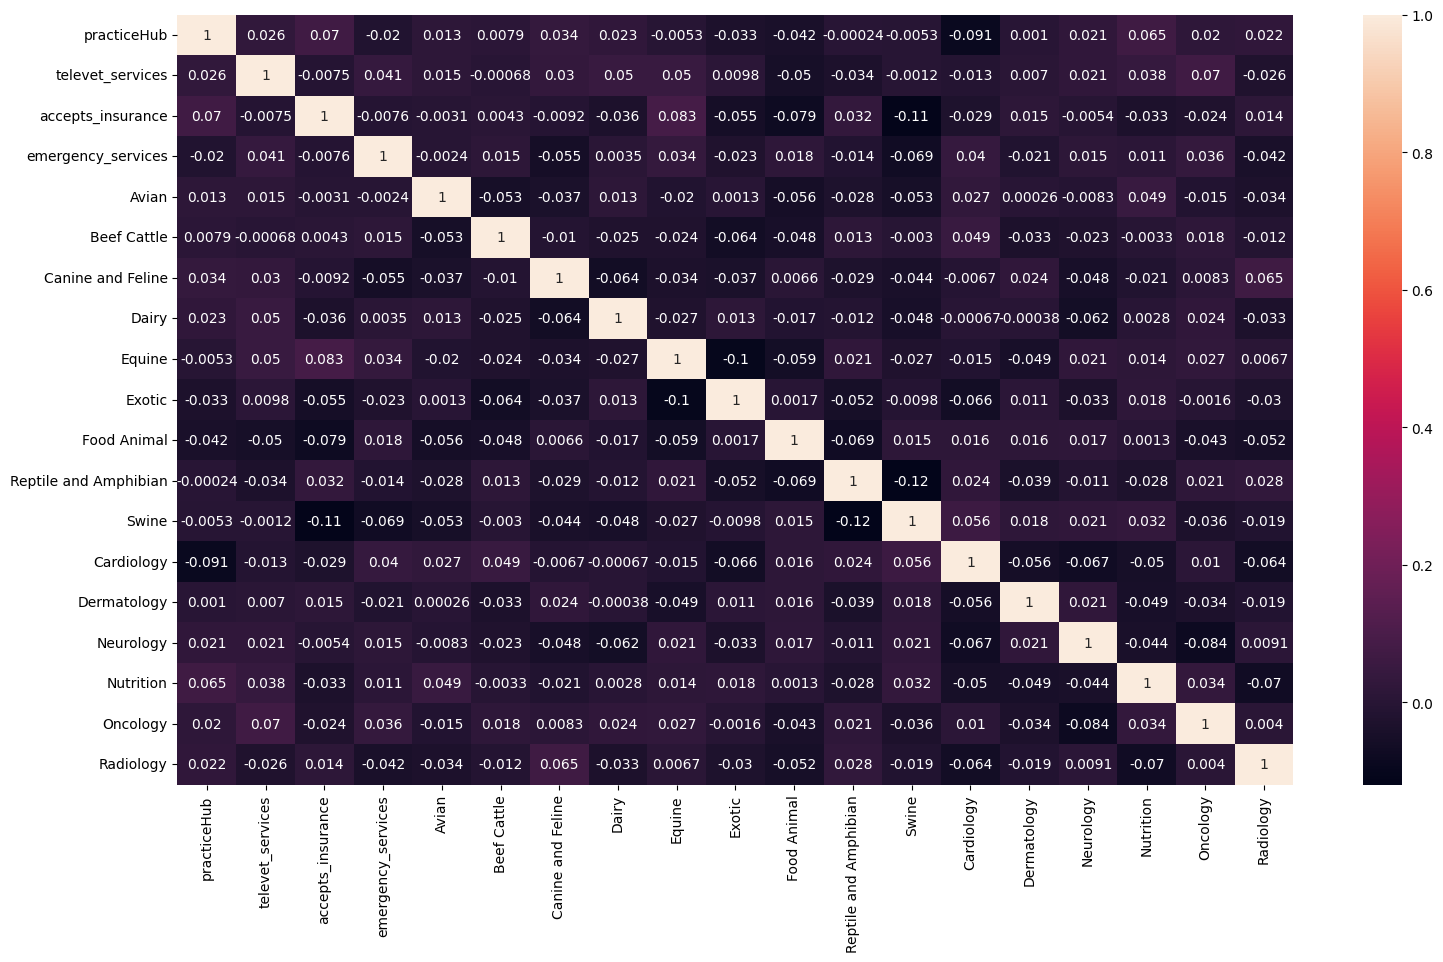

In [35]:
sns.heatmap(df_final[['practiceHub', 'televet_services','accepts_insurance',
       'emergency_services','Avian', 'Beef Cattle',
       'Canine and Feline', 'Dairy', 'Equine', 'Exotic', 'Food Animal',
       'Reptile and Amphibian', 'Swine', 'Cardiology', 'Dermatology',
       'Neurology', 'Nutrition', 'Oncology', 'Radiology']].corr(), annot=True)

fig = plt.gcf()
fig.set_size_inches(18,10)

In [60]:
df_02215 = pd.read_csv('02215.csv',dtype={'from_zip':str,'zip':str})
df_02215['zip'] = '0' + df_02215['zip']
df_02215

,clinic_name,address1,adress2,state,city,zip,phone,practiceHub,televet_services,accepts_insurance,...,Dermatology,Neurology,Nutrition,Oncology,Radiology,from_address,from_zip,walking_time,public_transit_time,driving_time
0,BetterVet - All Locations,60 MASSACHUSETTS AVE,NaN,MA,BOSTON,02115,8887881165,1,0,1,...,0,0,0,0,0,50 Leon Street,02115,20,19,10
1,Better Vet,16 MASSACHUSETTS AVE,NaN,MA,BOSTON,02115,6178308013,0,1,1,...,0,1,1,0,0,50 Leon Street,02115,22,20,14
2,Cantor clinic,44 BINNEY ST,NaN,MA,BOSTON,02115,6178691717,0,0,0,...,0,0,0,0,0,50 Leon Street,02115,20,14,9
3,HARVARD UNIVERSITY,665 Huntington Ave,SCHOOL OF PUBLIC HEALTH BLDG 1,MA,Boston,02115,6174321201,1,0,0,...,0,0,0,0,0,50 Leon Street,02115,14,9,12
4,Back Bay Veterinary Clinic,288 Newbury St,NaN,MA,Boston,02115,6172472273,1,0,0,...,0,0,0,0,0,50 Leon Street,02115,21,16,8
5,Better Vet Boston-Dr Sidley,60 MASSACHUSETTS AVE,NaN,MA,BOSTON,02115,6179396144,0,0,1,...,0,0,0,0,0,50 Leon Street,02115,20,19,10
6,DEACONESS MED CENTER RCV DOCK B I,77 AVENUE LOUIS PASTEUR,NaN,MA,BOSTON,02115,6177542225,1,0,1,...,0,0,1,1,0,50 Leon Street,02115,16,11,6
7,Vetcall - Boston,304 Commonwealth Ave,Apt 1A,MA,Boston,02115,8573627270,0,0,1,...,0,0,0,0,0,50 Leon Street,02115,22,17,12


In [61]:
df_02215.to_json('02215.json',orient="records")